In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [8]:
directory = os.fsencode('../../data/data_out/')
X = np.zeros((1,161))
y = np.empty(1)
i = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename != 'No_target_out.txt' and filename.startswith('walking_test_1'):
        path = os.path.join(os.fsdecode(directory), filename)
        print(path)                    
        data = pd.read_csv(path, sep='\t', header=None)
        print(data.values[:,:].shape)
        X = np.append(X,data.values[:,:], axis=0)
        y = np.append(y,i + np.zeros((data.shape[0],1)))
        i += 1
        plt.plot(data.values[:,:-1].T)
        plt.show()
X = X[1:,:]#/max(np.amax(dataset, axis = 0))
y = y[1:]

### Normalization

#range
range_max = np.max(X[:,:160])
range_min = np.min(X[:,:160])
print(range_max)
print(range_min)
X[:,:160] = (X[:,:160] - range_min)/(range_max - range_min)

#distance
dist_max = np.max(X[:,-1])
dist_min = np.min(X[:,-1])
print(dist_max)
print(dist_min)
X[:,-1] = (X[:,-1] -dist_min)/(dist_max - dist_min)

../data_out/walking_test_1_out_concatenate_chirps.txt
(100, 2817)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 161 and the array at index 1 has size 2817

In [3]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=100)
X_train = X
y_train = y

../data_out/biking_mixed_128_test_2_out_concatenate_chirps.txt
(451, 161)


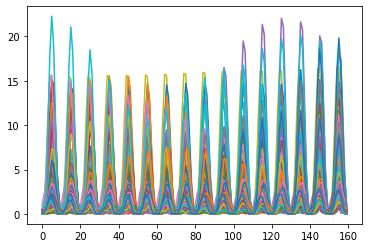

../data_out/walking_mixed_128_test_2_out_concatenate_chirps.txt
(515, 161)


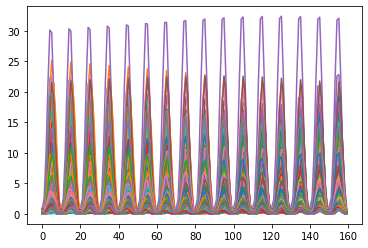

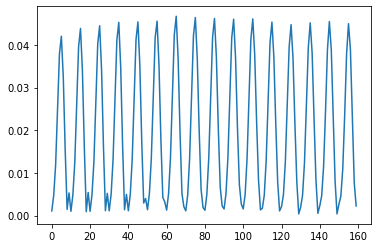

In [4]:
X = np.zeros((1,161))
y = np.empty(1)
i = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename != 'No_target_out.txt' and filename.endswith('2_out_concatenate_chirps.txt'):
        path = os.path.join(os.fsdecode(directory), filename)
        print(path)                    
        data = pd.read_csv(path, sep='\t', header=None)
        print(data.values[:,:].shape)
        X = np.append(X,data.values[:,:], axis=0)
        y = np.append(y,i + np.zeros((data.shape[0],1)))
        i += 1
        plt.plot(data.values[:,:-1].T)
        plt.show()
X = X[1:,:]#/max(np.amax(dataset, axis = 0))
y = y[1:]

### Normalization

#range
X[:,:160] = (X[:,:160] - range_min)/(range_max - range_min)

plt.plot(X[0,:-1])

#distance

X[:,-1] = (X[:,-1] -dist_min)/(dist_max - dist_min)

In [5]:
X_test = X
y_test = y

In [6]:
svc = SVC(random_state=0)

param_grid = [{'kernel': ['rbf'], 'gamma': [1, 1e-1, 1e-2, 1e-3],
                     'C': [1, 10, 100, 1000, 10000]}]

search = GridSearchCV(
    estimator=svc, param_grid=param_grid,
    scoring='accuracy'
)
search.fit(X_train, y_train)
print("Best parameters set found on development set:")
print(search.best_params_)
y_pred = search.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Best parameters set found on development set:
{'C': 10000, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.8074534161490683


In [7]:
print(X_train.shape)

(1034, 161)


In [8]:
from sklearn import linear_model
reg = linear_model.RidgeClassifierCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)
print(reg.alpha_)
y_pred = reg.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

0.01
Accuracy: 0.7639751552795031


In [9]:
y_pred = search.predict(X_test)

In [10]:
y_pred.shape

(966,)

In [11]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_pred, y))

Accuracy: 0.8074534161490683


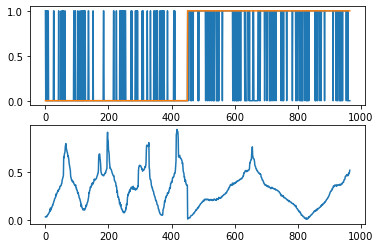

In [14]:
chirps = y_pred.shape[0]
fig, ax = plt.subplots(2,1)
ax[0].plot(y_pred[:chirps])
ax[0].plot(y_test[:chirps])
ax[1].plot(X[:chirps,-1].T)

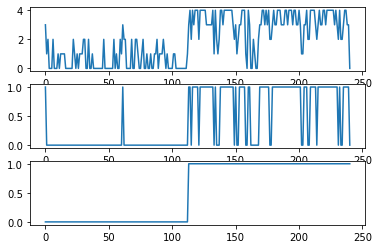

In [15]:
consec_frames = 4
total_frames = X.shape[0]//consec_frames
accuracy = 0

frame_prediction_array = np.zeros(total_frames)
frame_truth = np.zeros(total_frames)

for i in range(total_frames):
    
    frame_pred = np.sum(search.predict(X[i*consec_frames:(i+1)*consec_frames,:]))
    answer = 0
    if(frame_pred > consec_frames//2):
        answer = 1
    frame_prediction_array[i] = frame_pred
    frame_truth[i] = y[i*consec_frames]

    
fig, ax = plt.subplots(3,1)
ax[0].plot(frame_prediction_array)
ax[1].plot(np.round(frame_prediction_array/consec_frames))
ax[2].plot(frame_truth)
